In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords

In [9]:
# Rule Based Approach

In [10]:
data=pd.read_csv('Elon_musk.csv' ,encoding='ISO-8859-1')
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [12]:
data['Text'] = data['Text'].str.replace("[^A-Za-z]+"," ",).str.lower()
data['Text']=data['Text'].str.replace("[0-9]+","")

<ipython-input-12-3d140ca24ac4>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text'] = data['Text'].str.replace("[^A-Za-z]+"," ",).str.lower()
<ipython-input-12-3d140ca24ac4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text']=data['Text'].str.replace("[0-9]+","")


In [13]:
data.head()

,Unnamed: 0,Text
0,1,kunalb i m an alien
1,2,id aa carmack ray tracing on cyberpunk with h...
2,3,joerogan spotify great interview
3,4,gtera doge is underestimated
4,5,teslacn congratulations tesla china for amazi...


In [14]:
string= data['Text'].str.split(" ")

In [16]:
string.head()

0                          [, kunalb, i, m, an, alien]
1    [, id, aa, carmack, ray, tracing, on, cyberpun...
2            [, joerogan, spotify, great, interview, ]
3                  [, gtera, doge, is, underestimated]
4    [, teslacn, congratulations, tesla, china, for...
Name: Text, dtype: object

In [17]:
ret = re.sub("[^A-Za-z]+"," ","abc@Xy8z")
ret

'abc Xy z'

In [18]:
# STOPWORDS

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
stop_words = stopwords.words('english')

In [23]:
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [24]:
flat_list = [word for sublist in string for word in sublist]

In [27]:
flat_list[:10]

['', 'kunalb', 'i', 'm', 'an', 'alien', '', 'id', 'aa', 'carmack']

In [28]:
ip_reviews_words = [w for w in flat_list if not w in stop_words]

In [30]:
ip_reviews_words[:20]

['',
 'kunalb',
 'alien',
 '',
 'id',
 'aa',
 'carmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'next',
 'level',
 'tried',
 '',
 '',
 'joerogan',
 'spotify',
 'great',
 'interview']

In [31]:
ip_rev_string = " ".join(ip_reviews_words)

In [34]:
ip_rev_string

' kunalb alien  id aa carmack ray tracing cyberpunk hdr next level tried   joerogan spotify great interview   gtera doge underestimated  teslacn congratulations tesla china amazing execution last year next even  happy new year ox https co wfkmyu oj frodo underdoge thought would fail https co zgxjfdzzrm  owensparks flcnhvy anonyx haha thanks   flcnhvy anonyx indeed tweets definitely represent real world time allocation  entertaining outcome likely  givedirectly sent agree clubhouse kanyewest https co rwe uhsts  geoffkeighley unrealengine getting real bought dogecoin lil x toddler hodler  joshmanmode definitely issues sentencing seems bit high  freewalletorg thanks fixing  freewalletorg please unlock account  astrojordy u f u f  true power haha https co fc uhqsd  freewalletorg crypto wallet give private keys avoided costs  freewalletorg app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission https co pwt   ajtourville yes  blkmdl ration

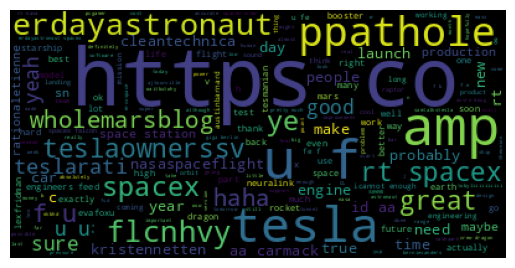

In [36]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      max_words = 200
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)
plt.axis("off")
plt.show()

# positive words

In [38]:
# Choose the path for +ve words stored in system

In [41]:
with open("/content/positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")

In [50]:
poswords

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Positive',
 ';',
 '; This file contains a list of POSITIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an opi

In [46]:
# postive wordcloud

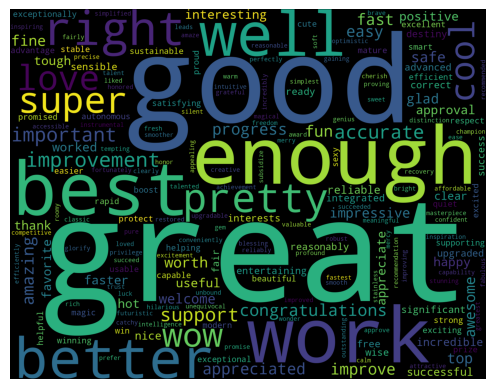

In [49]:
ip_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos)
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.show()

negative words

In [51]:
# negative words

In [52]:
# Choose path for -ve words stored in system

In [53]:
with open("/content/negative-words.txt","r",encoding='latin-1') as neg:
    negwords = neg.read().split("\n")

In [54]:
 negwords

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Negative',
 ';',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an o

In [57]:
#  negtive wordcloud

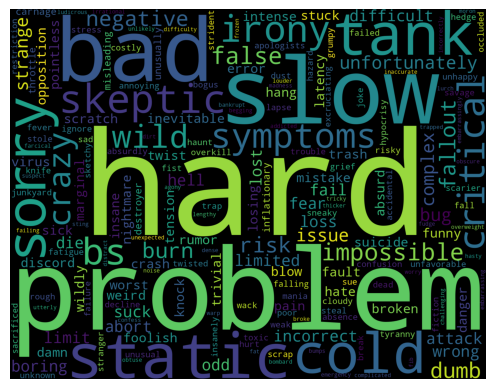

In [55]:
ip_neg= " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg)

plt.imshow(wordcloud_neg)
plt.axis("off")

plt.show()

length in postive and negative words

In [59]:
len(ip_reviews_words)

19485

In [60]:
len(ip_pos)

8519

In [61]:
len(ip_neg)

5318

In [62]:
8519/19485

0.4372081088016423

In [63]:
5318/19485

0.2729278932512189

#Vader Lexicon

In [64]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [65]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [66]:
sia = SentimentIntensityAnalyzer()

In [93]:
a=data.loc[5]['Text']
a

'happy new year of the ox https t co wfkmyu oj'

In [94]:
sia.polarity_scores(a)

{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.5719}

In [96]:
def get_vader_sentiment(review):
    '''
    Utility function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    sia = SentimentIntensityAnalyzer()
    # create TextBlob object of passed tweet text
    analysis = sia.polarity_scores(review)
    # set sentiment
    if analysis["compound"] > 0:
        return 'positive sentiment'
    elif analysis["compound"] < 0:
        return 'negative sentiment'
    else:
        return 'neutral'

In [97]:
get_vader_sentiment(a)

'positive sentiment'